# Spam E-mail Detection

<b>Team Members:</b>  
Binqian Zeng  
Jui-Ting Hsu (jh3572)  
Liwei Song  
Zhaopeng Liu  

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from utils import *

plt.style.use("ggplot")

In [85]:
data = pd.read_csv("spambase/spambase.data", header = None, names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam"])

In [86]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Exploratory Data Analysis & Preprocessing

In [87]:
data.shape

(4601, 58)

In [88]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [89]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

The dataset contains 4601 instances, each with 57 features. Each instance contains the aggregated features of an email body text. Each email is labeled as either spam (spam=1) or ham (spam=0). From the above, we can see that all of the features are numerical features. Note that the label 'spam' is listed as of type int64. It might be a good idea to use an encoder to encode this feature since it is a categorical variable instead of numerical.

In [90]:
getDfSummary(data, drop_na = False).T

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000
number_nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
number_distinct,142.000000,171.000000,214.000000,43.000000,255.000000,141.000000,173.000000,170.000000,144.000000,245.000000,...,313.000000,641.000000,225.000000,964.000000,504.000000,316.000000,2161.000000,271.000000,919.000000,2.000000


From the data summary, we can see that there are no missing values in the dataset. However, almost all of the variables are of different scales. This may be troublesome if we decide to use methods like SVM that maps the data onto vector spaces. Therefore, the next step to take might be to normalize the data.

In [91]:
data_scaled = pd.DataFrame(data)
for col in data.columns[:-1]:
    # scale data
    scaler = StandardScaler()
    data_scaled[col] = scaler.fit_transform(data[col])
getDfSummary(data_scaled).T

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000
mean,1.853187e-17,2.779780e-17,2.470916e-17,0.000000,4.941832e-17,3.706374e-17,-2.470916e-17,0.000000,2.470916e-17,1.235458e-17,...,1.235458e-17,-8.030476e-17,-2.470916e-17,1.235458e-17,0.000000,-9.265934e-18,1.853187e-17,1.235458e-17,2.470916e-17,0.394045
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,0.488698
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.321161e-01,-2.625994e-01,-4.656073e-01,0.000000
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.135824e-01,-2.369413e-01,-4.095278e-01,0.000000
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-2.738561e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-9.189671e-02,-1.907567e-01,-3.105639e-01,0.000000
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-0.046900,1.007920e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-1.231813e-01,...,-1.584534e-01,1.811501e-01,-1.551977e-01,5.631450e-02,-0.096848,-1.030484e-01,-4.682327e-02,-4.707129e-02,-2.851691e-02,1.000000
max,1.452700e+01,1.090096e+01,9.560519e+00,30.641278,1.440691e+01,2.112571e+01,1.828261e+01,27.441249,1.855779e+01,2.782844e+01,...,1.785384e+01,3.556066e+01,3.715432e+01,3.949191e+01,24.108447,4.608659e+01,3.458704e+01,5.099205e+01,2.566085e+01,1.000000
number_nan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
number_distinct,1.420000e+02,1.710000e+02,2.140000e+02,43.000000,2.550000e+02,1.410000e+02,1.730000e+02,170.000000,1.440000e+02,2.450000e+02,...,3.130000e+02,6.410000e+02,2.250000e+02,9.640000e+02,504.000000,3.160000e+02,2.161000e+03,2.710000e+02,9.190000e+02,2.000000


Since this is a binary classification, it is also important to look at the distribution of the label of the instances. There might be problems if there are significant skewness in the distribution of the labels. In other words, the amount of spam and hams in the data should be on the same magnitude.

Number of spam: 1813 , 39.404477287546186 %
Number of ham: 2788 , 60.59552271245382 %


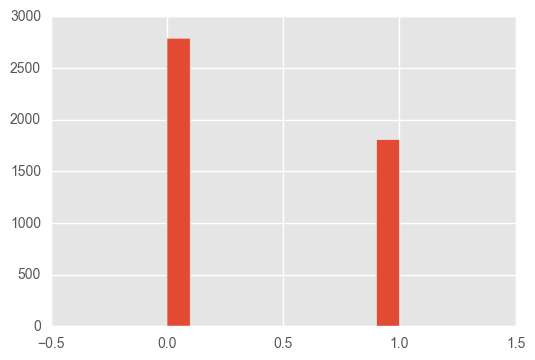

In [92]:
plt.hist(data_scaled['spam']);
plt.xlim([-0.5,1.5])
print("Number of spam:", len(data_scaled[data_scaled['spam']==1]), ",", len(data_scaled[data_scaled['spam']==1])/data_scaled.shape[0]*100,"%")
print("Number of ham:", len(data_scaled[data_scaled['spam']==0]), ",", len(data_scaled[data_scaled['spam']==0])/data_scaled.shape[0]*100,"%")

The distribution between spam email and ham email are roughly 60% and 40%. The difference is significant, but they are of the same magnitude. Also, the abundance of spam email is expected to be lower than ham emails in real life. Hence, the data is skewed at a reasonable level.  

Finally, we should split the data into training set and validation set so we know how well our models are working. In other words, we want to grab a sense of how our model will perform on future unseen datasets. Evaluating models on the training set is generally not a good idea since the models were learned to fit the training data when they were used for training. Furthermore, we should split our dataset into three parts: train, validation, and test.  

<b>Training data</b> is simply used as the training data to feed to the models.  
<b>Validation data</b> is used for parameter tuning.  
<b>Test data</b> is used for the final evaluation of models.  

Validation data won't suffice for final evaluations because we were biased towards them while tuning parameters in the models.  

A reasonable split would be 60/20/20.

In [93]:
test_size = 0.2
valid_size = 0.2
n = data_scaled.shape[0]

data_scaled_X = data_scaled.drop('spam',axis=1)
data_scaled_y = data_scaled['spam']

# split for test
X_train_and_valid, X_test, y_train_and_valid, y_test = train_test_split(data_scaled_X, data_scaled_y, test_size = int(test_size*n), random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_and_valid, y_train_and_valid, test_size = int(valid_size*n), random_state = 0)

print("Size of train data: ", X_train.shape[0])
print("Size of validation data: ", X_valid.shape[0])
print("Size of test data: ", X_test.shape[0])

Size of train data:  2761
Size of validation data:  920
Size of test data:  920


## Evaluation Metric

Since this is a classification problem, there are several options to consider for the evaluation metric. Some of the classification evaluation metric we covered are:  
- accuracy
- F-score
- AUC (Area Under the ROC curve)  

For the purpose of this problem, we preferred the use of AUC and the ROC curve over the other two options. The main reason for this decision is that accuracy and F-score both give equal weightings to the false positive rate and false negative rate of the prediction. However, this is definitely <b>NOT</b> the case in spam detection. The penalty of moving a regular email to the spam mailbox should be much more severe than moving a spam email to the regular inbox of a user. When classifying a regular email as a spam email (i.e. a false positive instance), we are introducing the risk of causing the user to miss information that might be important to him/her; whereas when classifying a spam email as a regular email (i.e. a false negative instance), the result is mere annoyance to the user, but no real actual harm is done.  

In conclusion, we decide to employ the <b>AUC and ROC curve</b> as the evaluation metric of our project, where we can assess the false positive and false negative rate accordingly.

## Modeling

### Baseline Model - Decision Tree

As a baseline model, we fit a decision tree model with the default parameters. One of the pros of using a decision tree as a baseline model is that we can also visualize the importance of each individual features and get a sense of what features might be important and what features might be discardable.

In [94]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

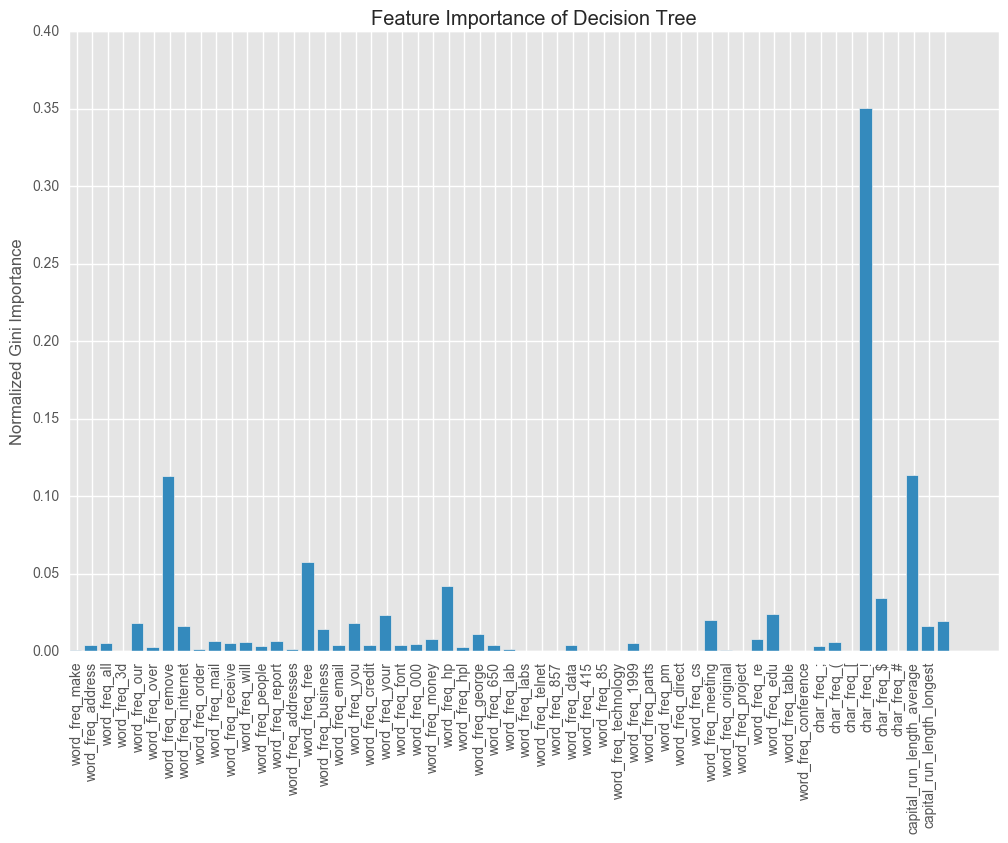

In [95]:
plt.figure(figsize = (12,8))
plt.bar(np.arange(0,len(dt.feature_importances_)), dt.feature_importances_)
ax = plt.gca()
ax.set_xticks(np.arange(len(dt.feature_importances_))+0.5)
ax.set_xticklabels(X_train.columns[:-1], rotation='vertical');
plt.title('Feature Importance of Decision Tree')
ax.set_ylabel('Normalized Gini Importance');

This plot seems rather overwhelming, bearing in mind that we have a total of 57 features. To get a closer look at the feature importance, we get rid of the features that are relatively unimportant. In this case, we set to neglect all variables below the threshold of 0.01 on the Normalized Gini Importance scale.

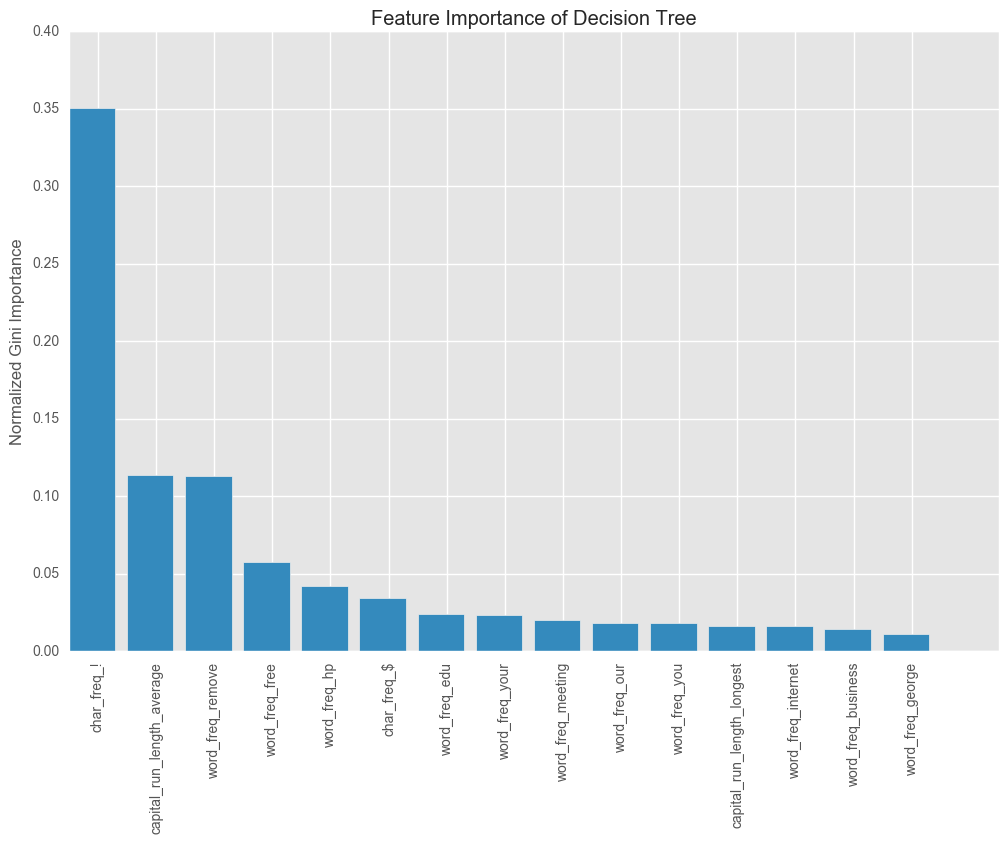

In [96]:
# filter out unimportant variables
importance_threshold = 0.01
filtered_features = [x for x in list(zip(X_train.columns[:-1],dt.feature_importances_)) if x[1] > importance_threshold]
filtered_features = sorted(filtered_features, key = lambda x: x[1], reverse = True)
filtered_features_name = [x[0] for x in filtered_features]
filtered_importances = [x[1] for x in filtered_features]

plt.figure(figsize = (12,8))
plt.bar(np.arange(0,len(filtered_importances)), filtered_importances)
ax = plt.gca()
ax.set_xticks(np.arange(len(filtered_features_name))+0.5)
ax.set_xticklabels(filtered_features_name, rotation='vertical');
plt.title('Feature Importance of Decision Tree')
ax.set_ylabel('Normalized Gini Importance');

From this preliminary result, we see that the top three most important features are:  

<b>`char_freq_!`</b>: the frequency of the character ! in the body text of the email.  
<b>`capital_run_length_average`</b>: the average length of consecutive capital letter occurences.   
<b>`word_freq_remove`</b>: the frequency of the word `remove` in the body text of the email.  

The top two features all resembles one thing: the tendency to <b>"yell"</b> in spam emails.

In [97]:
print("Train data accuracy: ",dt.score(X_train, y_train))
print("Test data accuracy: ",dt.score(X_valid, y_valid))

Train data accuracy:  1.0
Test data accuracy:  0.898913043478


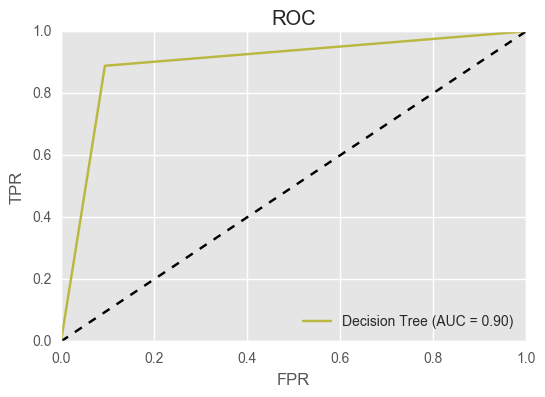

In [99]:
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
plotAUC(y_valid, dt.predict(X_valid), 'Decision Tree')

## Evaluation